In [2]:
import plotly
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#%matplotlib inline
dataset = pd.read_csv("heart_2020_cleaned_(1).csv")

In [3]:
len(dataset)

319795

In [4]:
dataset.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.475273,7.514536,0.135590,0.775362,3.595028,7.097075,0.134061,0.036833,0.093244,0.085595
std,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.499389,3.564759,0.342353,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775,0.279766
min,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,0.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,0.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,1.000000,10.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000
max,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,13.000000,1.000000,1.000000,5.000000,24.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
X = dataset.drop("HeartDisease",axis = 1)
y = dataset["HeartDisease"]

In [6]:
X.shape

(319795, 15)

In [7]:
print(X[:10])

     BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  Sex  \
0  16.60        1                0       0               3            30    0   
1  20.34        0                0       1               0             0    0   
2  26.58        1                0       0              20            30    1   
3  24.21        0                0       0               0             0    0   
4  23.71        0                0       0              28             0    0   
5  28.87        1                0       0               6             0    0   
6  21.63        0                0       0              15             0    0   
7  31.64        1                0       0               5             0    0   
8  26.45        0                0       0               0             0    0   
9  40.69        0                0       0               0             0    1   

   AgeCategory  Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  \
0            8         1        

In [8]:
y.shape

(319795,)

In [9]:
print(y[:10])

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: HeartDisease, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(239846, 15) (79949, 15) (239846,) (79949,)


In [12]:
#ramdom forest model
from sklearn.ensemble import RandomForestRegressor

In [13]:
#instantiation of the model
model = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [14]:
#fitting the model

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [15]:
# checking the oob score
model.oob_score_

0.14289025528087762

In [16]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [17]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

In [21]:
grid_search.best_score_

nan

In [24]:
from sklearn.model_selection import GridSearchCV

In [28]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=10,
                      n_jobs=-1, random_state=42)

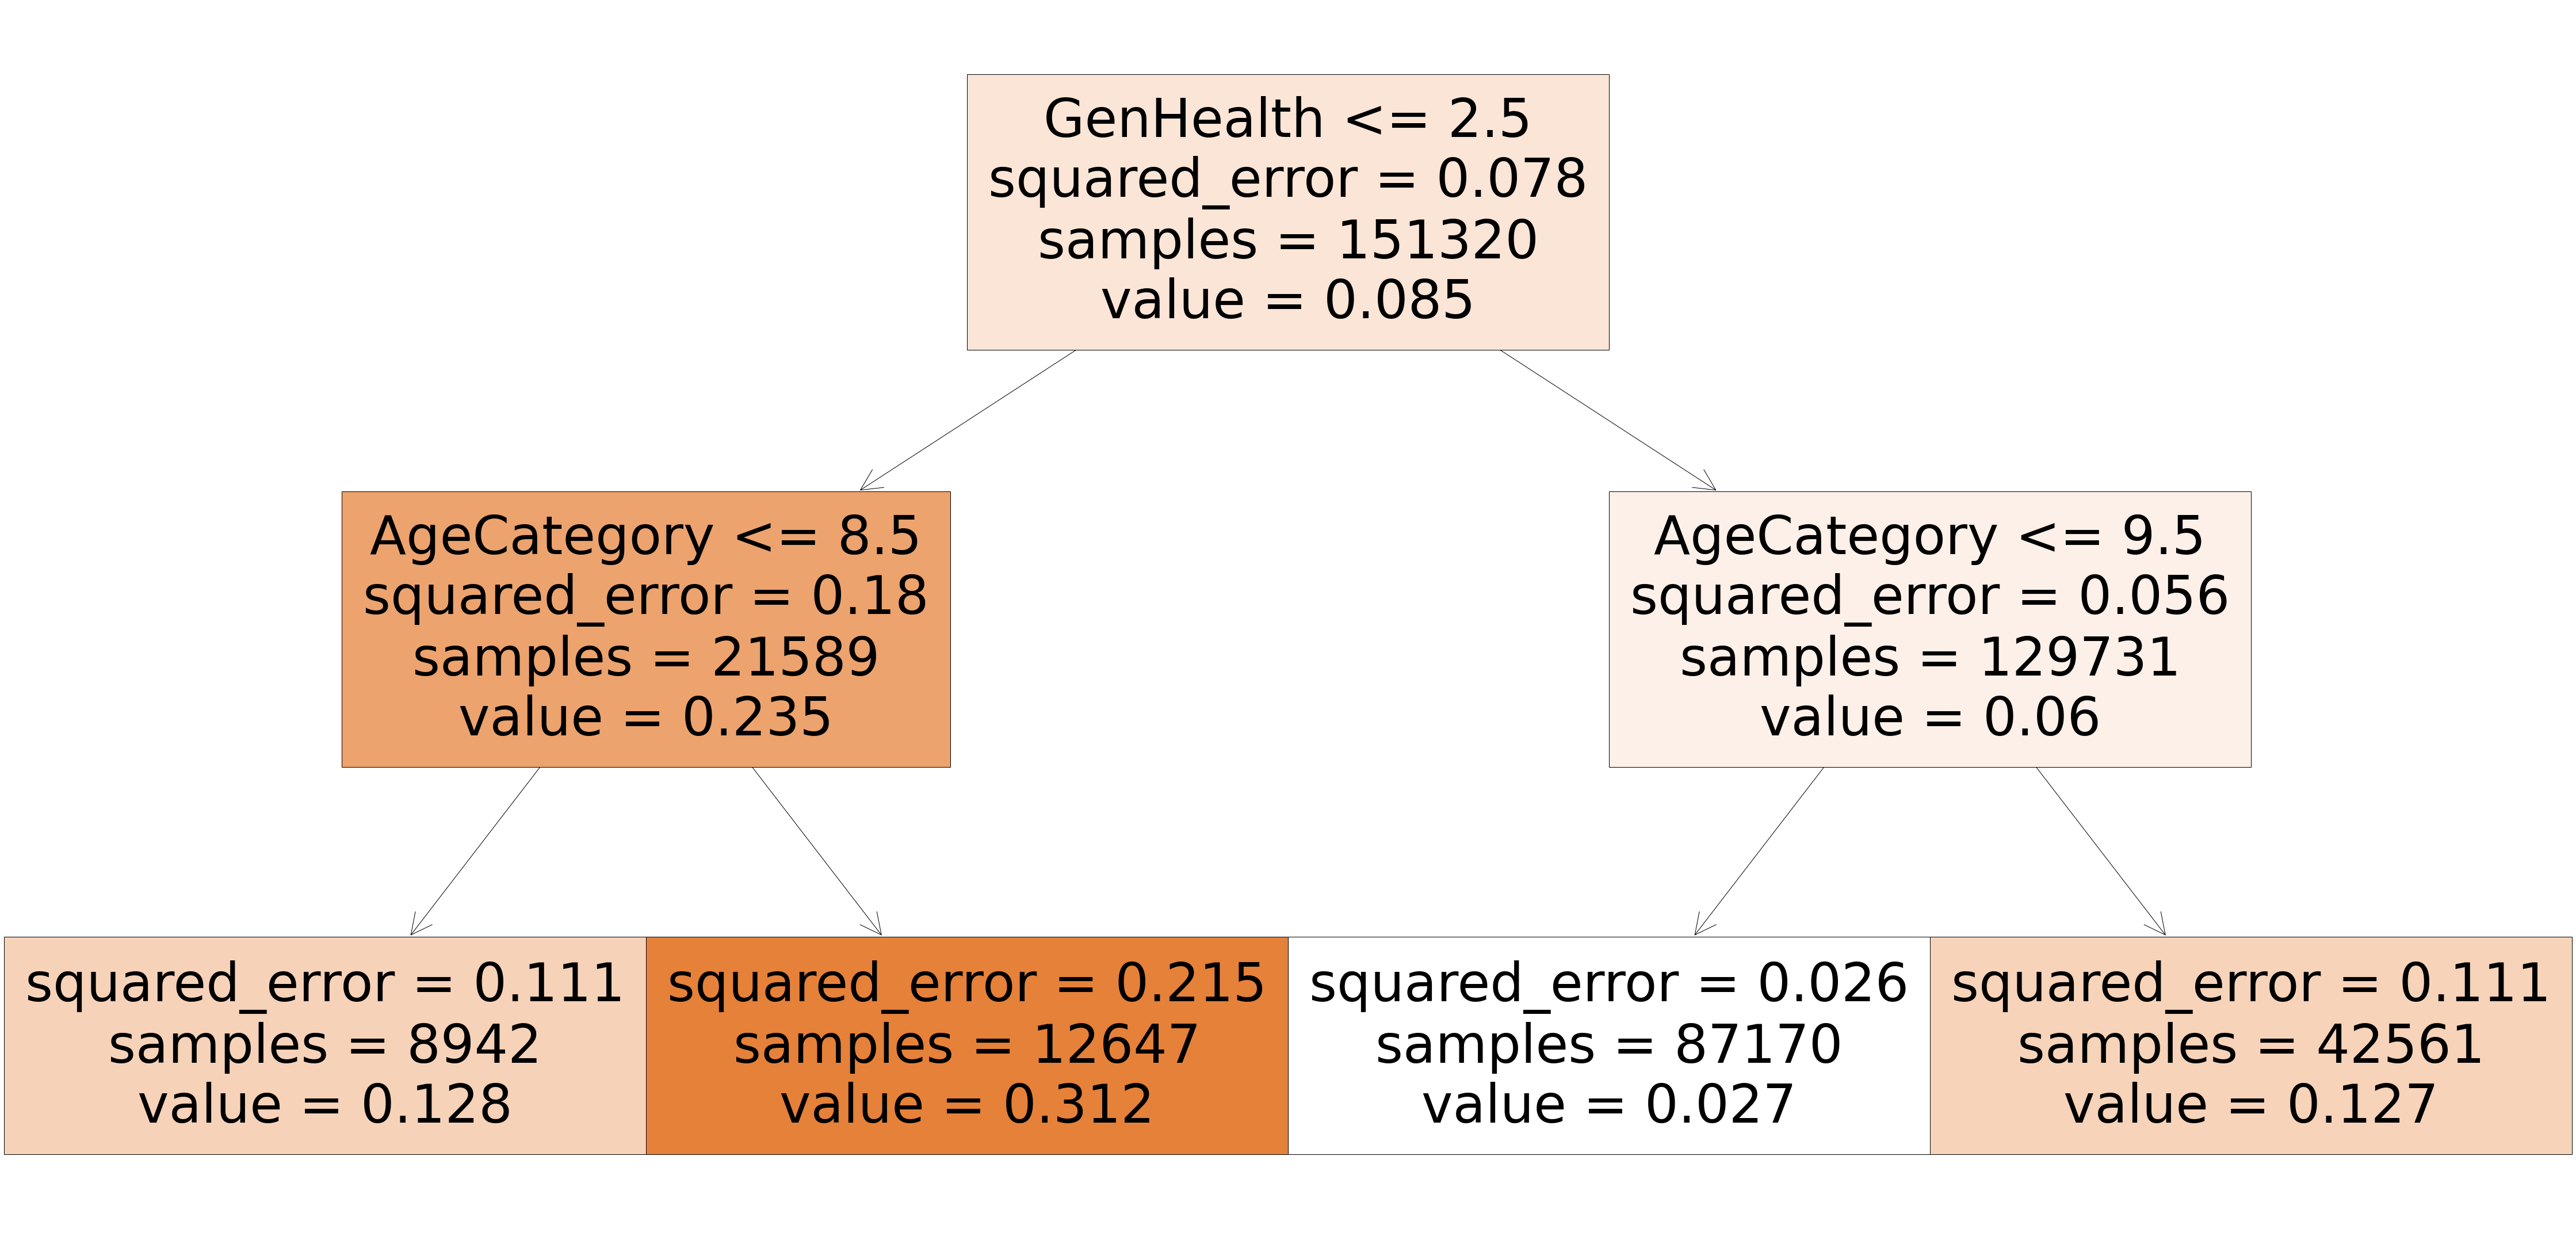

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

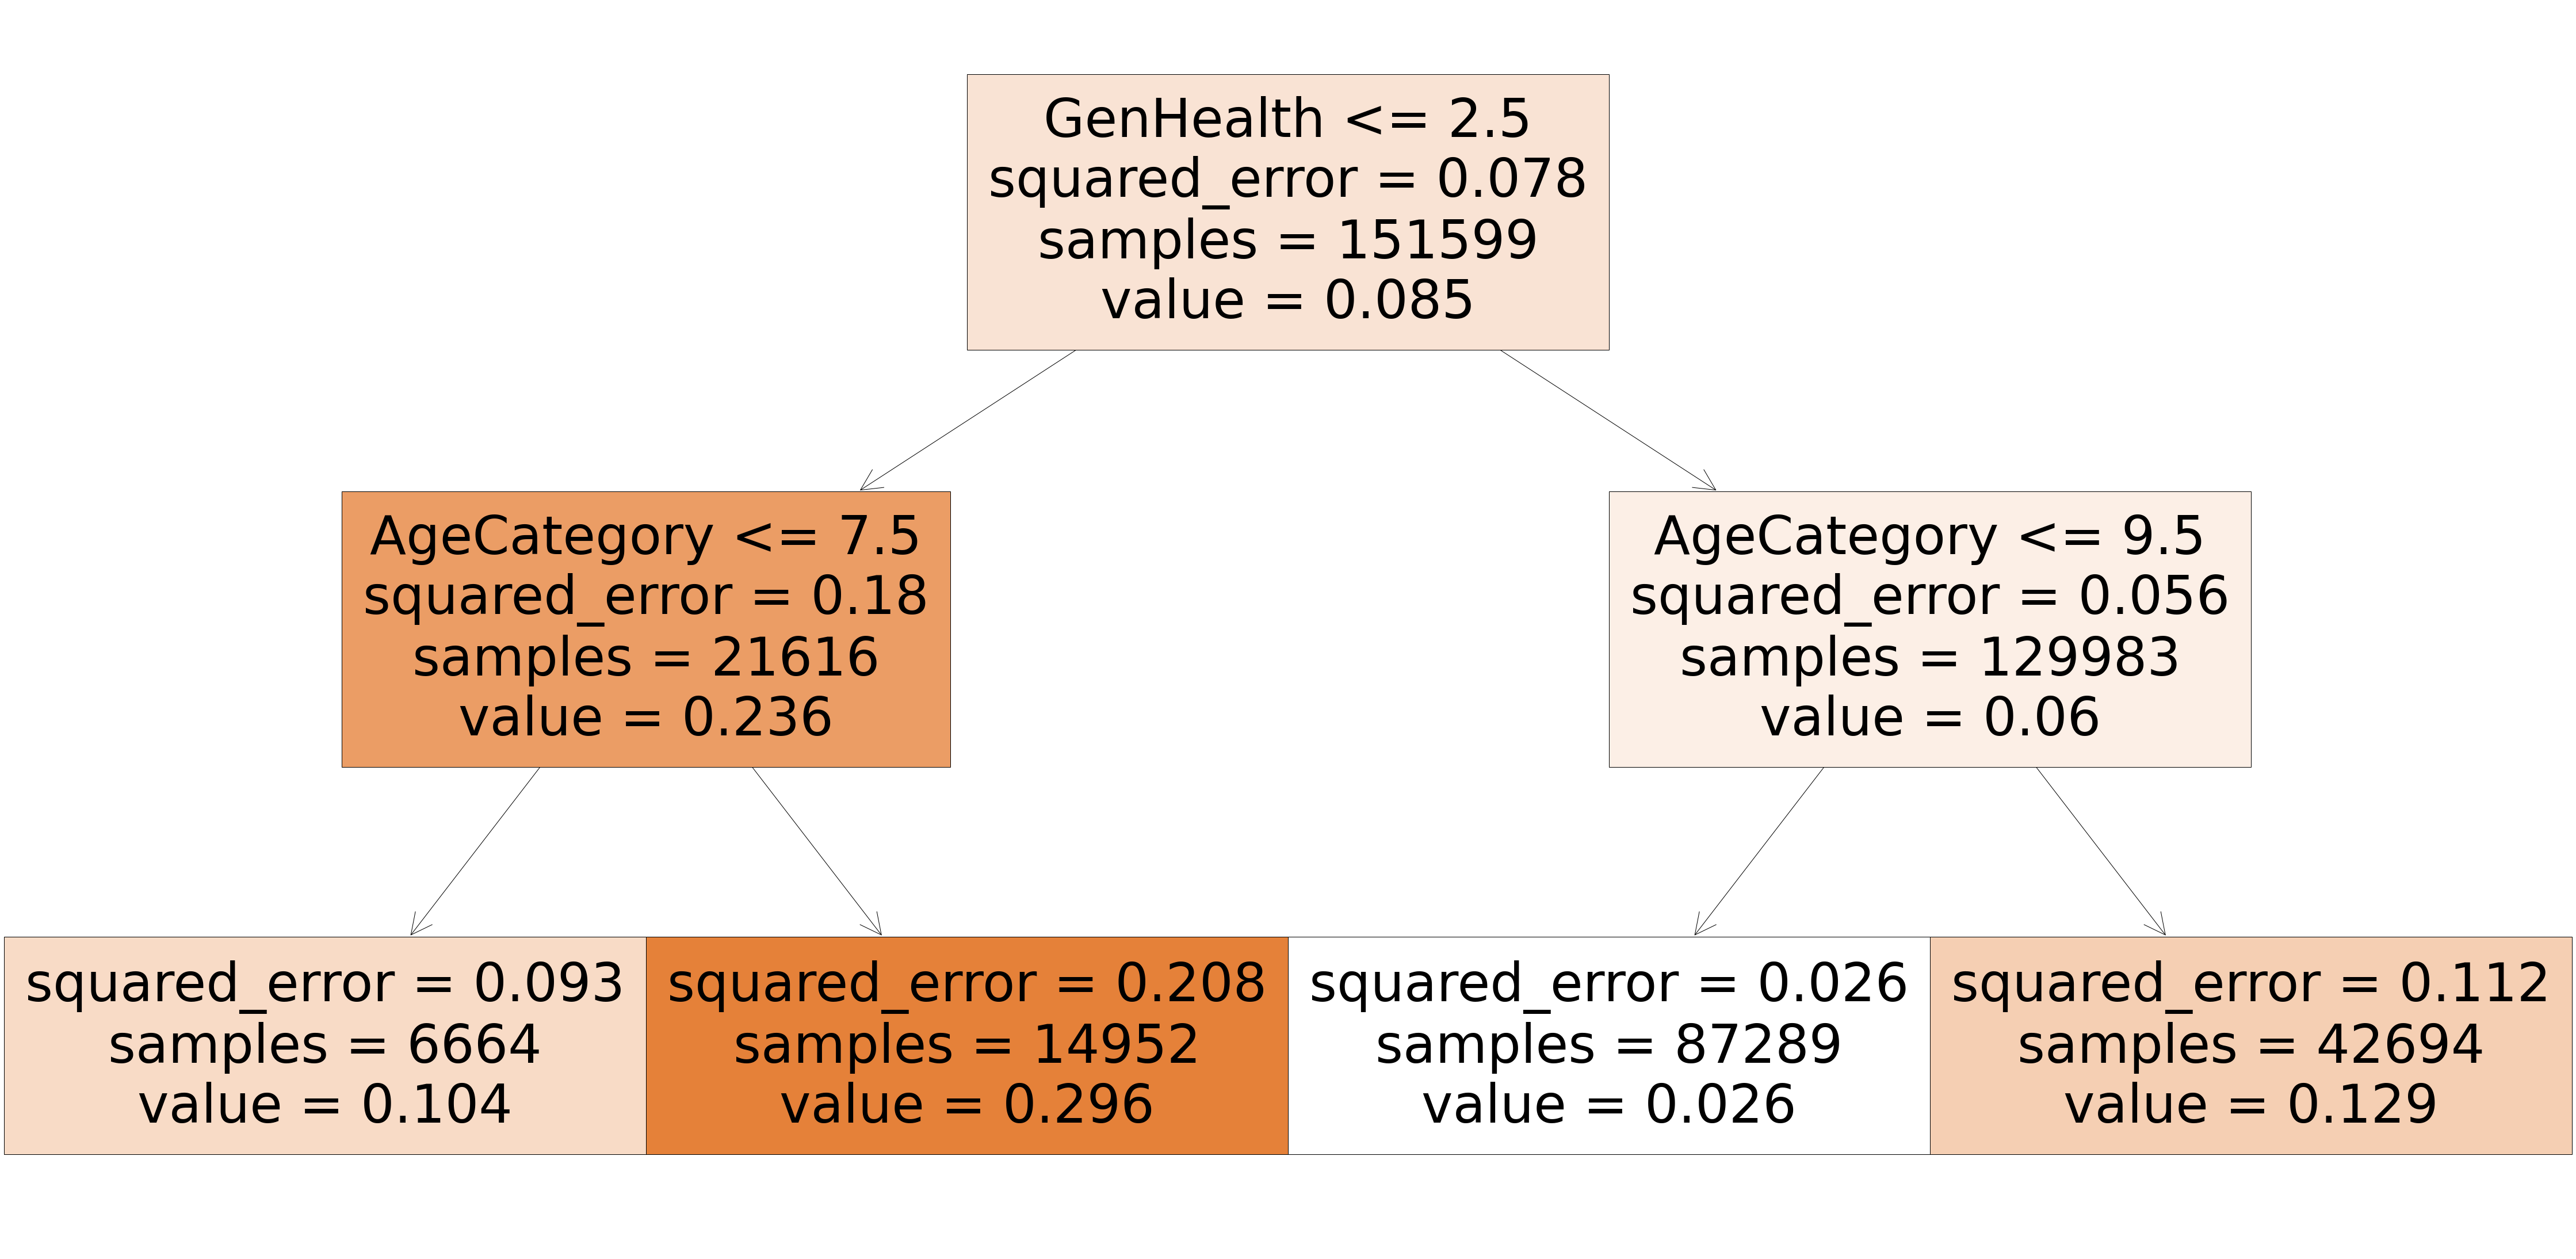

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [31]:
rf_best.feature_importances_

array([0.        , 0.        , 0.        , 0.01700757, 0.        ,
       0.        , 0.        , 0.43168719, 0.        , 0.        ,
       0.55130524, 0.        , 0.        , 0.        , 0.        ])

In [32]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [33]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
10,GenHealth,0.551305
7,AgeCategory,0.431687
3,Stroke,0.017008
0,BMI,0.000000
1,Smoking,0.000000
2,AlcoholDrinking,0.000000
4,PhysicalHealth,0.000000
5,MentalHealth,0.000000
6,Sex,0.000000
8,Diabetic,0.000000


In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13489391265571277
Mean Squared Error: 0.06700893418158252
Root Mean Squared Error: 0.2588608394129605


In [1]:
predictions = model.predict(X_test)

NameError: name 'model' is not defined